In [1]:
#Code to have a diagram for consistency scale for ease of explanation
#basically the polar color wheel without the color
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import numpy.ma as ma
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches

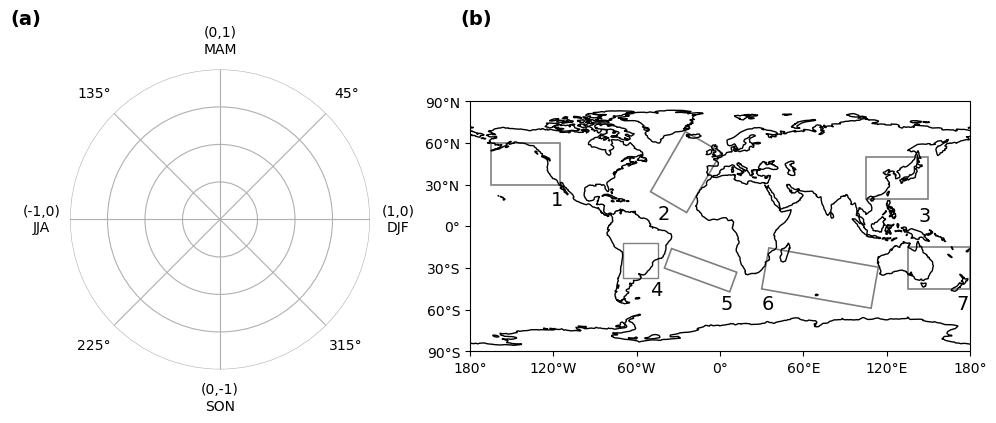

In [5]:
# Create a figure with two subplots
fig = plt.figure(figsize=(10, 7))

# Add a subplot for the polar color wheel
ax1 = fig.add_subplot(121, projection='polar', position=[0.05, 0.17, 0.3, 0.68])
 
# Plot a color mesh on the polar plot with the color set by the angle
n = 200 #the number of secants for the mesh
t = np.linspace(0, 2*np.pi, n)   #theta values
r1 = np.linspace(.6, 1, 5)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r1, t)      #create an r, theta meshgrid
c1 = tg                   #define color values as theta value
#im=ax1.pcolormesh(t, r1,c1.T)  #plot the colormesh on axis with colormap
ax1.set_yticklabels([])                   #turn off radial tick labels (yticks)
ax1.tick_params(pad=10, labelsize=24)      #cosmetic changes to tick labels
ax1.spines['polar'].set_visible(False)  
#ax1.set_title('Consistency scale', fontsize=12)
#Previous lists
custom_ticks = [0, np.pi / 2 , np.pi, (3/2)*np.pi]
custom_tick_labels = ['(1,0)\nDJF','(0,1)\nMAM','(-1,0)\nJJA','(0,-1)\nSON']
#New list
custom_ticks = [0, np.pi/4, np.pi / 2, (135/180)*np.pi , np.pi, (225/180)*np.pi, (3/2)*np.pi,(315/180)*np.pi]
custom_tick_labels = ['(1,0)\nDJF', '45°', '(0,1)\nMAM','135°', '(-1,0)\nJJA', '225°', '(0,-1)\nSON','315°']
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_tick_labels,fontsize=10)
# Remove the map background
ax1.set_facecolor('none')

ax1.text(-0.2, 1.2, "(a)", transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

# Add a subplot for the Earth map
lat=np.load('lat.npy')
lon=np.load('lon.npy')
min_lon, max_lon = np.min(lon), np.max(lon)
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree(), position=[0.45, -0.1, 0.5, 1.2])
ax2.text(1.3, 1.2, "(b)", transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')
# Plot the Earth map
ax2.coastlines()
#ax2.set_global()

# Longitude labels
ax2.set_extent([-180, 180, min_lon, max_lon], crs=ccrs.PlateCarree())

ax2.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
ax2.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax2.yaxis.set_major_formatter(lat_formatter)

# Adding patches
ax2.add_patch(mpatches.Rectangle(xy=[-165, 30], width=50, height=30,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )
# -100,45
ax2.annotate("1",(-122,15),color='black',fontsize=14)  # Change annotation color to black

ax2.add_patch(mpatches.Rectangle(xy=[-50, 25], width=30, height=50,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                angle=-30,
                                transform=ccrs.PlateCarree())
             )
# -25,55
ax2.annotate("2",(-45,5),color='black',fontsize=14)  # Change annotation color to black

ax2.add_patch(mpatches.Rectangle(xy=[105, 20], width=45, height=30,  # Shifted right, slightly reduced width
                                alpha=0.5,
                                lw=1.2,  
                                facecolor='None',
                                edgecolor='black',  
                                angle=0,  
                                transform=ccrs.PlateCarree())
             )
ax2.annotate("3",(143,3.5),color='black',fontsize=14)  # Change annotation color to black

ax2.add_patch(mpatches.Rectangle(xy=[-70, -37], width=25, height=25,
# xy=[-85, -63], width=30, height=50
                                alpha=0.5,
                                lw=1,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )
# -80,-61
ax2.annotate("4",(-50,-50),color='black',fontsize=14)  # Change annotation color to black
# -96,-61
ax2.add_patch(mpatches.Rectangle(xy=[30, -45], width=80, height=30,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                angle=-10,
                                transform=ccrs.PlateCarree())
             )
# 35,-40
ax2.annotate("6",(30,-60),color='black',fontsize=14)  # Change annotation color to black

ax2.add_patch(mpatches.Rectangle(xy=[-40, -30], width=50, height=15,
# xy=[140, -45], width=30, height=30
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                angle=-20,
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )
# 157,-42
ax2.annotate("5",(0,-60),color='black',fontsize=14)  # Change annotation color to black

ax2.add_patch(mpatches.Rectangle(xy=[135, -45], width=45, height=30,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                angle=0,  # Remove rotation
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )

ax2.annotate("7", (170, -60), color='black', fontsize=14)  # Shift annotation to the right



#plt.subplots_adjust(bottom=0.1)


plt.show()